In [1]:
import os
import pandas as pd
import numpy as np
import librosa
import librosa.display
from IPython.display import Audio
import matplotlib.pyplot as plt
import scipy
import scipy.fftpack as fftpk
from scipy.fft import fft

In [2]:
# Create paths and read metadata
audio_files_path = os.path.abspath("UrbanSound8K/audio/")
metadata_path = os.path.abspath("UrbanSound8K/metadata/UrbanSound8K.csv")

metadata= pd.read_csv(metadata_path)
metadata

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
...,...,...,...,...,...,...,...,...
8727,99812-1-2-0.wav,99812,159.522205,163.522205,2,7,1,car_horn
8728,99812-1-3-0.wav,99812,181.142431,183.284976,2,7,1,car_horn
8729,99812-1-4-0.wav,99812,242.691902,246.197885,2,7,1,car_horn
8730,99812-1-5-0.wav,99812,253.209850,255.741948,2,7,1,car_horn


In [3]:
# Creating file path for audio
file_path=f"{audio_files_path}/fold{metadata['fold'][0]}/{metadata['slice_file_name'][0]}"
file_path

'C:\\Users\\Acelya\\Downloads\\UrbanSound8K\\audio/fold5/100032-3-0-0.wav'

In [12]:
# Loading audio
# sr = None, will load the audio file in its original sampling rate. 

samples, sampling_rate =librosa.load(file_path, sr=None)
len(samples), sampling_rate

(14004, 44100)

In [13]:
# samples is an array of amplitudes.
samples

array([-0.00454712, -0.00483704, -0.00460815, ..., -0.00065613,
       -0.00048828,  0.        ], dtype=float32)

In [6]:
# The sampling rate refers to ‘sampling frequency’ used while recording the audio file. 
# sampling_rate says that this audio was recorded(sampled) with a sampling frequency of 44100. 
# In other words, while recording this file we were capturing 44100 amplitudes every second. 
sampling_rate

44100

In [7]:
# Duration of audio
duration_of_sound= len(samples) /sampling_rate
print(duration_of_sound, " seconds")

0.31755102040816324  seconds


In [22]:
# Playing audio
Audio(samples, rate=sampling_rate)

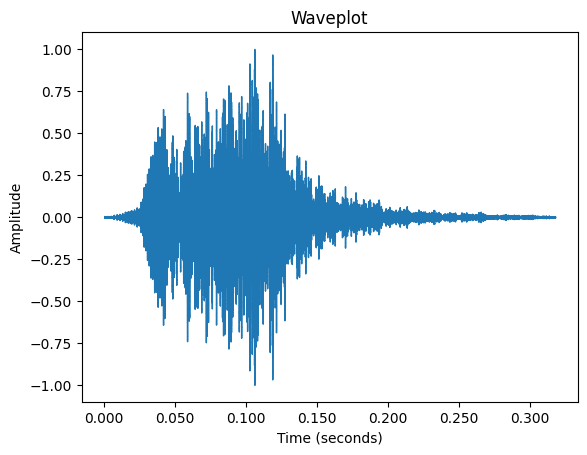

In [21]:
# Visualizing Audio
# This visualization is called the time-domain representation of a given signal. 
# This shows the loudness (amplitude) of sound wave changing with time. 
# amplitude = 0 represents silence.

plt.figure()
librosa.display.waveshow(y=samples, sr=sampling_rate)
plt.title("Waveplot")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.show()

### Fast-Fourier & Discrete-Fourier Transforms

These amplitudes are not very informative, as they only talk about the loudness of audio recording. 
To better understand the audio signal, it is necessary to transform it into the frequency-domain. 
The frequency-domain representation of a signal tells us what different frequencies are present in the signal. 
A Fast-Fourier transformation (FFT) is an algorithm that can compute a Discrete Fourier Transformation (DFT) and can convert this time-domain discrete signal into a frequency-domain. 

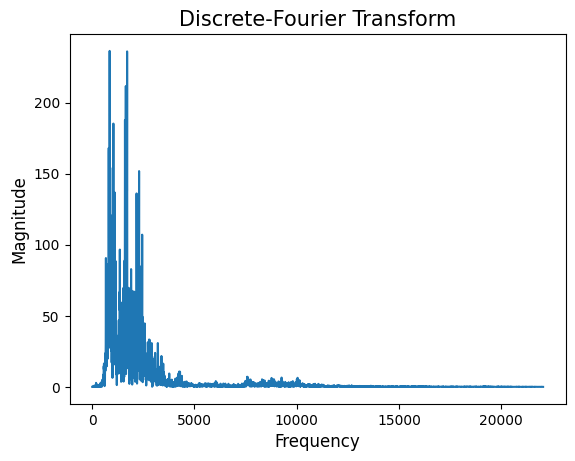

In [27]:
# Creating a Discrete-Fourier Transform with our FFT algorithm
fast_fourier_transf = np.fft.fft(samples)

# Magnitudes indicate the contribution of each frequency
magnitude = np.abs(fast_fourier_transf)

# mapping the magnitude to the relative frequency bins
frequency = np.linspace(0, sampling_rate, len(magnitude))

# We only need the first half of the magnitude and frequency
left_mag = magnitude[:int(len(magnitude)/2)]
left_freq = frequency[:int(len(frequency)/2)]
plt.plot(left_freq, left_mag)
plt.title("Discrete-Fourier Transform", fontdict=dict(size=15))
plt.xlabel("Frequency", fontdict=dict(size=12))
plt.ylabel("Magnitude", fontdict=dict(size=12))
plt.show()

The only issue with a DFT is the fact that it is static — there is no time associated with this plot. So to incorporate time into our audio to see what frequencies impact at what time, we should make a spectrogram.

### Short-Time Fourier Transformation

To create a spectrogram, we can’t use a Fast-Fourier Transformation on the entire audio at once. Instead of performing an FFT across the entire signal, we will take small segments, or frames, of the audio signal and apply FFTs to each of these frames. This is called a Short-Time Fourier Transformation (STFT).

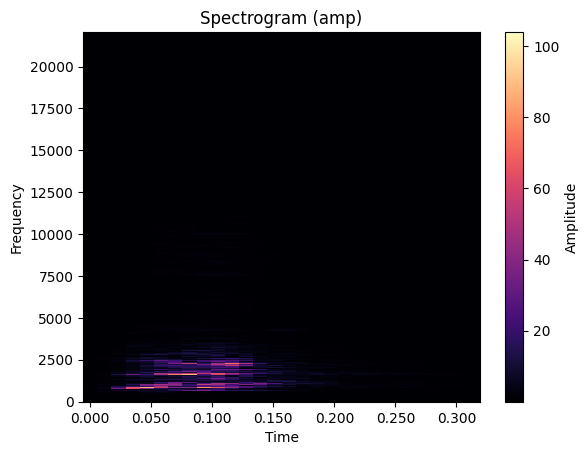

In [30]:
# Short-time Fourier Transformation on our audio data
audio_stft = librosa.stft(samples)

# gathering the absolute values for all values in our audio_stft
spectrogram = np.abs(audio_stft)

# Plotting the short-time Fourier Transformation
plt.figure()

# Using librosa.display.specshow() to create our spectrogram
librosa.display.specshow(spectrogram, sr=sampling_rate, x_axis="time", y_axis="hz")
plt.colorbar(label="Amplitude")
plt.title("Spectrogram (amp)")
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.show()

Most of these frequencies contribute very little to the overall amplitude of the sound. We convert our spectrograms from amplitude to decibels.

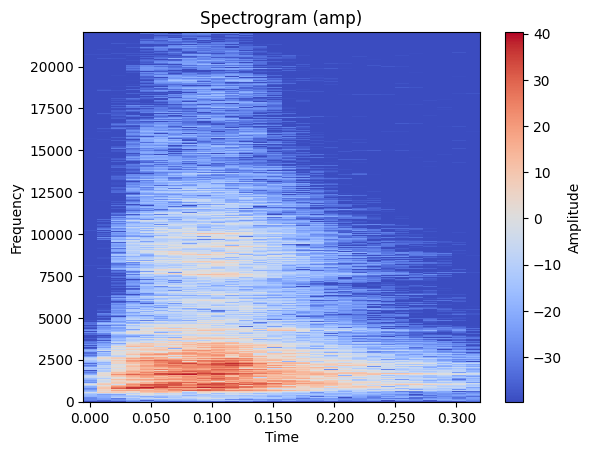

In [32]:
# Converting the amplitude to decibels
log_spectro = librosa.amplitude_to_db(spectrogram)

# Plotting the short-time Fourier Transformation
librosa.display.specshow(log_spectro, sr=sampling_rate, x_axis="time", y_axis="hz")
plt.colorbar(label="Amplitude")
plt.title("Spectrogram (amp)")
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.show()

### Mel Spectrogram

Visual representation of frequencies of a given signal with time is called Spectrogram.

In a spectrogram, the horizontal axis represents time, the vertical axis represents frequency, and the color intensity represents the amplitude of a frequency at a certain point in time. 

The difference between a spectrogram and a Mel-spectrogram is that a Mel-spectrogram converts the frequencies to the mel-scale.
Mel-spectrograms provide a perceptually relevant amplitude and frequency representation. 

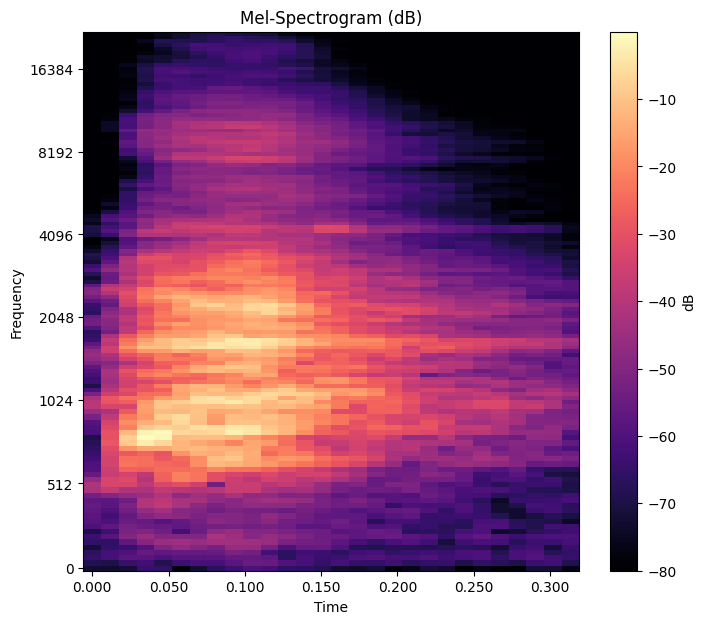

In [35]:
mel_signal = librosa.feature.melspectrogram(y=samples, sr=sampling_rate)
spectgrm = np.abs(mel_signal)
power_to_db = librosa.power_to_db(spectgrm, ref=np.max)


plt.figure(figsize=(8, 7))
librosa.display.specshow(power_to_db, sr=sampling_rate, x_axis="time", y_axis="mel", cmap="magma")
plt.colorbar(label="dB")
plt.title('Mel-Spectrogram (dB)')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()

Mel-spectrogram provides more information in the image of our audio file

# Resources

[ML Checklist](https://github.com/ageron/handson-ml/blob/master/ml-project-checklist.md)

https://github.com/mariostrbac/environmental-sound-classification

https://www.mathworks.com/matlabcentral/fileexchange/96148-urban-sound-classification-using-deep-learning

https://dropsofai.com/understanding-audio-data-fourier-transform-fft-and-spectrogram-features-for-a-speech-recognition-system/

https://towardsdatascience.com/audio-deep-learning-made-simple-sound-classification-step-by-step-cebc936bbe5

https://importchris.medium.com/how-to-create-understand-mel-spectrograms-ff7634991056

https://towardsdatascience.com/audio-deep-learning-made-simple-part-2-why-mel-spectrograms-perform-better-aad889a93505
    
https://importchris.medium.com/how-to-create-understand-mel-spectrograms-ff7634991056